<a href="https://colab.research.google.com/github/AqsaAkmal/ToDoApp/blob/main/GenAIAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!/bin/bash
!kaggle datasets download msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 96% 58.0M/60.3M [00:03<00:00, 23.9MB/s]
100% 60.3M/60.3M [00:03<00:00, 16.8MB/s]


In [2]:
import zipfile

# Path to the ZIP file
zip_path = '/content/fer2013.zip'
extract_path = '/content/fer2013'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

Files extracted to: /content/fer2013


In [3]:
import os

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


Extracted files: ['test', 'train']


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [5]:
# Paths to train and test directories
train_dir = '/content/fer2013/train'
test_dir = '/content/fer2013/test'

In [6]:
# Image size and batch size
img_size = (48, 48)
batch_size = 64

In [7]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize to [0, 1]
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split training data into train and validation sets
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

In [8]:
# Training and validation data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [9]:
# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [10]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 categories for emotion
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,  # Adjust epochs based on performance and time
    verbose=1
)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 34s 74ms/step - accuracy: 0.2337 - loss: 1.8443 - val_accuracy: 0.2529 - val_loss: 1.8011
Epoch 2/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.2500 - loss: 1.7954 - val_accuracy: 0.2574 - val_loss: 1.7863
Epoch 3/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.2537 - loss: 1.7864 - val_accuracy: 0.2615 - val_loss: 1.7645
Epoch 4/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.2620 - loss: 1.7725 - val_accuracy: 0.2670 - val_loss: 1.7540
Epoch 5/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.2690 - loss: 1.7546 - val_accuracy: 0.2822 - val_loss: 1.7409
Epoch 6/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.2831 - loss: 1.7435 - val_accuracy: 0.2923 - val_loss: 1.7121
Epoch 7/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.2972 - loss: 1.7216 - val_accuracy: 0.3132 - val_loss: 1.6922
Epoch 8/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.3037 - loss: 1.6968 - val_accurac

In [13]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 1.2867
Test Accuracy: 0.5085


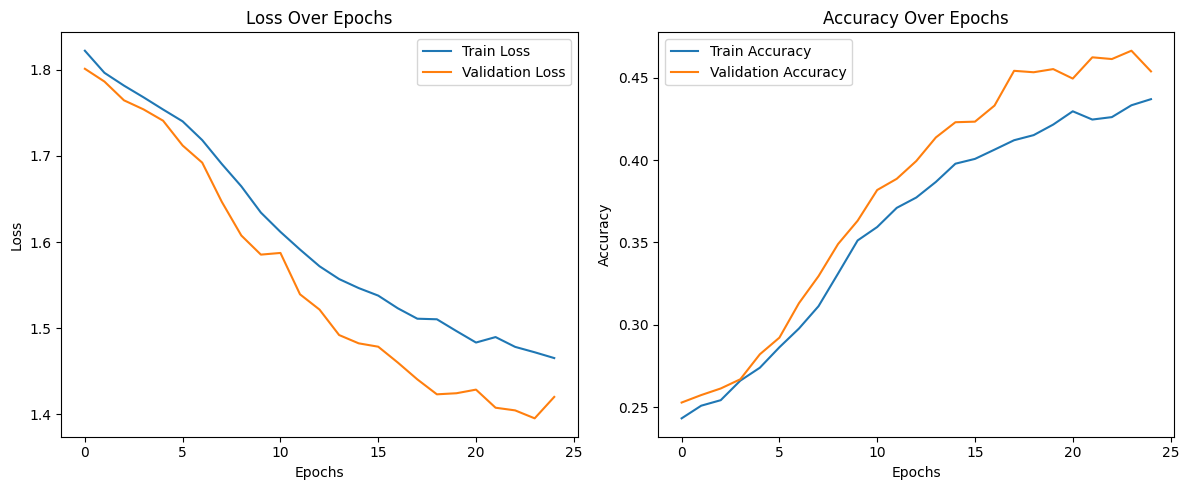

In [14]:
# Plot training and validation performance
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
